In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


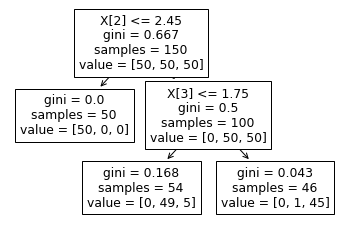

In [4]:
iris_data = pd.read_csv("../input/iris/Iris.csv")
X = iris_data.drop(['Species'], axis = 1)
X = X.drop(['Id'], axis = 1)
y = iris_data['Species']
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)
tree.plot_tree(clf)
print(X)

There are 3 regions: 

X[2] > 0.8 -> gini = 0.0 -> [50, 0, 0]

X[3] > 1.75 -> gini = 0.168 -> [0, 49, 5]

X[3] <= 1.75 -> gini = 0.043 -> [0, 1, 45]

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


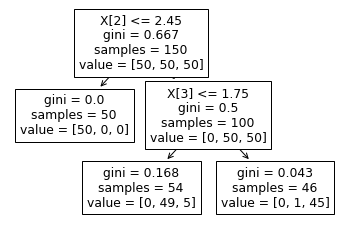

In [5]:
iris_data = pd.read_csv("../input/iris/Iris.csv")
X = iris_data.drop(['Species'], axis = 1)
X = X.drop(['Id'], axis = 1)
y = iris_data['Species']
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)
tree.plot_tree(clf)
print(X)

uUing the PetalLenghtCm it gave us a more precise results.

we can se that because our decision tree got as results [50, 0, 0], [0, 50, 0] and [0, 0, 50]

showing that there is a better way to make the tree of decision by asking it to define by the rigth caracteristic

[Text(0.4, 0.8333333333333334, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

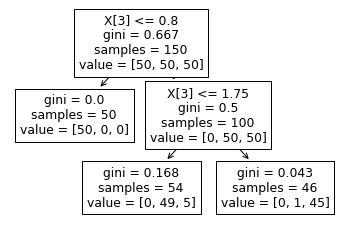

In [5]:
iris_data = pd.read_csv("../input/iris/Iris.csv")
X = iris_data.drop(['Species'], axis = 1)
X = X.drop(['Id'], axis = 1)
y = iris_data['Species']
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)
tree.plot_tree(clf)

[Text(0.4, 0.8333333333333334, 'X[3] <= 0.7\ngini = 0.656\nsamples = 95\nvalue = [50, 61, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'X[3] <= 1.75\ngini = 0.476\nsamples = 64\nvalue = [0, 61, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.163\nsamples = 41\nvalue = [0, 61, 6]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 23\nvalue = [0, 0, 33]')]

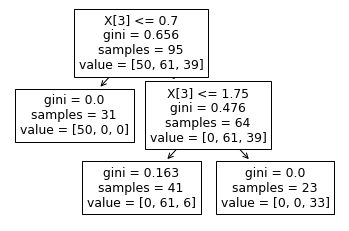

In [3]:
clf = RandomForestClassifier(max_depth = 2, random_state = 0)
clf = clf.fit(X, y)
tree.plot_tree(clf.estimators_[4])

There are still 3 regions, however they got regions where the results where more mixed.

[Text(0.39285714285714285, 0.9166666666666666, 'X[0] <= 5.55\ngini = 0.666\nsamples = 98\nvalue = [51, 46, 53]'),
 Text(0.14285714285714285, 0.75, 'X[3] <= 0.8\ngini = 0.338\nsamples = 40\nvalue = [49, 12, 1]'),
 Text(0.07142857142857142, 0.5833333333333334, 'gini = 0.0\nsamples = 29\nvalue = [49, 0, 0]'),
 Text(0.21428571428571427, 0.5833333333333334, 'X[3] <= 1.6\ngini = 0.142\nsamples = 11\nvalue = [0, 12, 1]'),
 Text(0.14285714285714285, 0.4166666666666667, 'gini = 0.0\nsamples = 10\nvalue = [0, 12, 0]'),
 Text(0.2857142857142857, 0.4166666666666667, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6428571428571429, 0.75, 'X[3] <= 1.55\ngini = 0.501\nsamples = 58\nvalue = [2, 34, 52]'),
 Text(0.5, 0.5833333333333334, 'X[3] <= 0.75\ngini = 0.16\nsamples = 24\nvalue = [2, 32, 1]'),
 Text(0.42857142857142855, 0.4166666666666667, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(0.5714285714285714, 0.4166666666666667, 'X[2] <= 5.0\ngini = 0.059\nsamples = 22\nvalue = [0, 32, 1

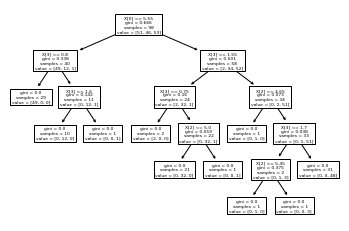

In [4]:
clf = RandomForestClassifier(max_depth = 5, random_state = 0)
clf = clf.fit(X, y)
tree.plot_tree(clf.estimators_[2])

There are more divisions and they got more especifics, however it took a longger time to separate and make the tree, and there are categories with just 2 samples, so we can say that we are overfeting the program

[Text(0.4, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.657\nsamples = 100\nvalue = [46, 62, 42]'),
 Text(0.3, 0.75, 'gini = 0.0\nsamples = 33\nvalue = [46, 0, 0]'),
 Text(0.5, 0.75, 'X[3] <= 1.75\ngini = 0.482\nsamples = 67\nvalue = [0, 62, 42]'),
 Text(0.2, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.14\nsamples = 39\nvalue = [0, 61, 5]'),
 Text(0.1, 0.4166666666666667, 'gini = 0.0\nsamples = 35\nvalue = [0, 58, 0]'),
 Text(0.3, 0.4166666666666667, 'X[2] <= 5.45\ngini = 0.469\nsamples = 4\nvalue = [0, 3, 5]'),
 Text(0.2, 0.25, 'X[1] <= 2.45\ngini = 0.48\nsamples = 3\nvalue = [0, 3, 2]'),
 Text(0.1, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 2]'),
 Text(0.3, 0.08333333333333333, 'gini = 0.0\nsamples = 2\nvalue = [0, 3, 0]'),
 Text(0.4, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 3]'),
 Text(0.8, 0.5833333333333334, 'X[2] <= 4.85\ngini = 0.051\nsamples = 28\nvalue = [0, 1, 37]'),
 Text(0.7, 0.4166666666666667, 'X[1] <= 3.1\ngini = 0.444\nsamples = 2\nvalue = [0, 1, 

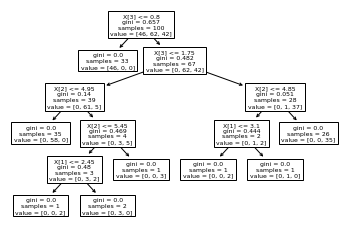

In [8]:
clf = RandomForestClassifier(max_depth = 10, random_state = 0)
clf = clf.fit(X, y)
tree.plot_tree(clf.estimators_[1])

It didn't create 10 dephts, because with 6 depths it could already define all of the regions with no error or overpositioning

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

X_test.info()
X_train.info()
print('y Test size: ', y_test.size,'\n')
print('y Train size: ', y_train.size,'\n')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 82 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  60 non-null     float64
 1   SepalWidthCm   60 non-null     float64
 2   PetalLengthCm  60 non-null     float64
 3   PetalWidthCm   60 non-null     float64
dtypes: float64(4)
memory usage: 2.3 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 60 to 99
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  90 non-null     float64
 1   SepalWidthCm   90 non-null     float64
 2   PetalLengthCm  90 non-null     float64
 3   PetalWidthCm   90 non-null     float64
dtypes: float64(4)
memory usage: 3.5 KB
y Test size:  60 

y Train size:  90 



In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)

#X_test.info()
#X_train.info()
#print('y Test size: ', y_test.size,'\n')
#print('y Train size: ', y_train.size,'\n')

[Text(0.5, 0.8333333333333334, 'X[3] <= 1.55\ngini = 0.662\nsamples = 57\nvalue = [25, 33, 32]'),
 Text(0.25, 0.5, 'X[3] <= 0.7\ngini = 0.492\nsamples = 33\nvalue = [25, 32, 0]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.0\nsamples = 16\nvalue = [25, 0, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.0\nsamples = 17\nvalue = [0, 32, 0]'),
 Text(0.75, 0.5, 'X[3] <= 1.75\ngini = 0.059\nsamples = 24\nvalue = [0, 1, 32]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.0\nsamples = 21\nvalue = [0, 0, 30]')]

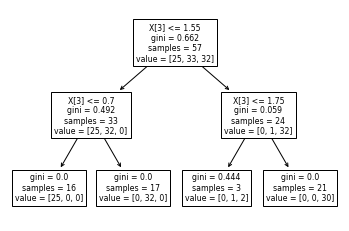

In [13]:
clf = RandomForestClassifier(max_depth = 2, random_state = 0)
clf = clf.fit(X_train, y_train)
tree.plot_tree(clf.estimators_[1])

In [14]:
import sklearn.metrics
from sklearn.metrics import accuracy_score
scores=[]
y_predict = clf.predict(X_test)
scores.append(accuracy_score(y_test, y_predict))
print(scores)

[0.95]


In [40]:
import sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors = 3)
neigh = neigh.fit(X_train,y_train)

y_pred=neigh.predict(X_test)

scores.append(accuracy_score(y_test, y_pred))

KNeighborsClassifier()
#print(neigh.predict(X_train))
print(scores)
print(neigh.predict_proba(X_train))

[0.9833333333333333, 0.9833333333333333, 0.9833333333333333, 0.9833333333333333]
[[0.         1.         0.        ]
 [0.         0.         1.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [0.         0.33333333 0.66666667]
 [0.         1.         0.        ]
 [0.         1.         0.        ]
 [0.         1.         0.        ]
 [0.         0.         1.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [0.         0.         1.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         1.         0.        ]
 [1.         0.         0.        ]
 [1.         0.         0.        ]
 [0.         0.    

In [22]:
help(KNeighborsClassifier)

Help on class KNeighborsClassifier in module sklearn.neighbors._classification:

class KNeighborsClassifier(sklearn.neighbors._base.KNeighborsMixin, sklearn.base.ClassifierMixin, sklearn.neighbors._base.NeighborsBase)
 |  KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
 |  
 |  Classifier implementing the k-nearest neighbors vote.
 |  
 |  Read more in the :ref:`User Guide <classification>`.
 |  
 |  Parameters
 |  ----------
 |  n_neighbors : int, default=5
 |      Number of neighbors to use by default for :meth:`kneighbors` queries.
 |  
 |  weights : {'uniform', 'distance'} or callable, default='uniform'
 |      Weight function used in prediction.  Possible values:
 |  
 |      - 'uniform' : uniform weights.  All points in each neighborhood
 |        are weighted equally.
 |      - 'distance' : weight points by the inverse of their distance.
 |        in this case, closer neighbors of